<a href="https://colab.research.google.com/github/guptavaishnavi536/openCV/blob/main/openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/guptavaishnavi536/openCV.git

Cloning into 'openCV'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [2]:
!pip install opencv-python==3.4.3.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.0 MB 1.5 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


**Load the image**

In [7]:
import cv2
from google.colab.patches import cv2_imshow
 
# load the image and show some basic information on it
image = cv2.imread("/content/openCV/IMAGES/bb.JPG")

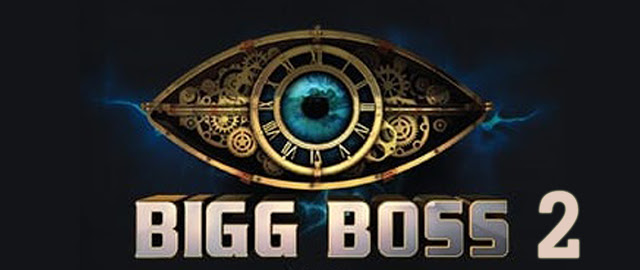

In [8]:
# show the image
#image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)

In [9]:
# save the image -- OpenCV handles converting file types automatically
cv2.imwrite("big_boss_2.jpg", image)

True

**Drawing function**

In [ ]:
#it is useful for face detection. As the image will consist of the whole body but we can use the drawing function to detect the face only

In [11]:
import numpy as np# used to create empty images

In [13]:
canvas = np.ones((500, 500, 3), dtype="uint8")*255 # array of ones with 500 as width and height and has 3 parameters: RGB for a coloured image. We have used unsigned integer i.e uint8 which is 2^8=256 i.e 0 to 255 is the range for a pixel 0 is black and 255 is white.
#multiplying with 255 will make every pixel as 255 giving us a white image.

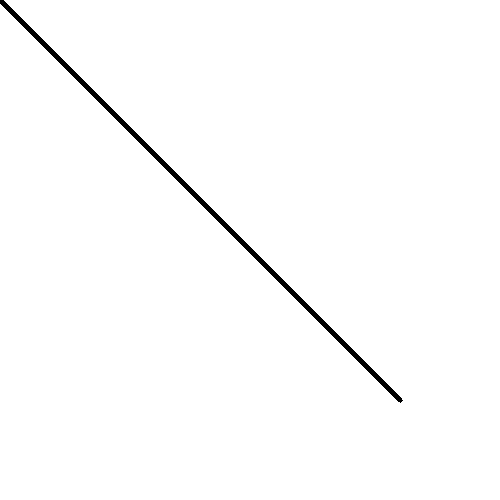

In [14]:
black = (0, 0, 0) #B,G,R. This tuple represents black colour
cv2.line(canvas, (0, 0), (400, 400), black,3) #0,0 is the starting point and 400,400 is the ending point and thickness is 3
cv2_imshow(canvas)

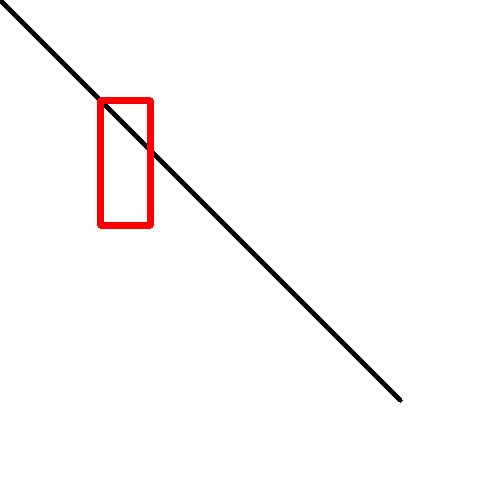

In [15]:
red =[0,0,255]
cv2.rectangle(canvas, (150, 100), (100, 225), red, 5)
cv2_imshow(canvas)

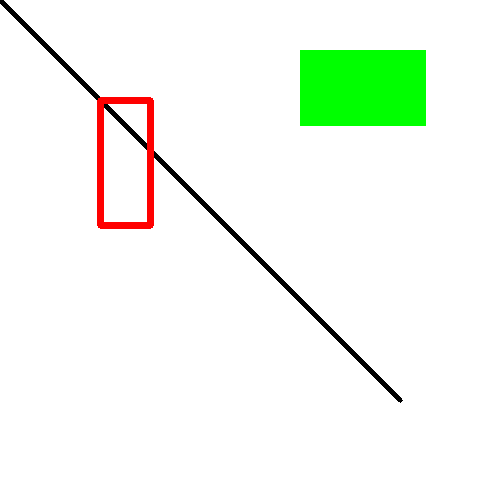

In [17]:
green = (0, 255, 0)
cv2.rectangle(canvas, (300, 50), (425, 125), green, -1) # -1 is used for filling the drawing with a solid colour
cv2_imshow(canvas)

In [18]:
canvas = np.zeros((500, 500, 3), dtype="uint8") # creating an empty black image

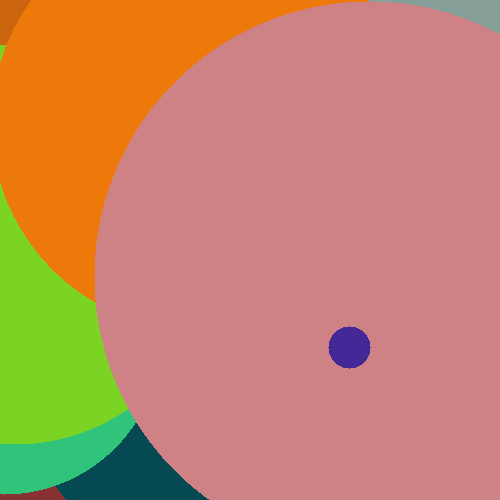

In [19]:
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a random
	# color, and then pick a random point on our canvas where the circle
	# will be drawn
	radius = np.random.randint(5, high=300)
	color = np.random.randint(0, high=256, size = (3,)).tolist()
	pt = np.random.randint(0, high=400, size = (2,))

	# draw our random circle
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# Show our masterpiece
cv2_imshow(canvas)

**Smoothing and bluring to remove noise from an image**
It occurs when the value pixels increases abruptly rather than a gradual change making it difficult for ML algos to extract features from the image

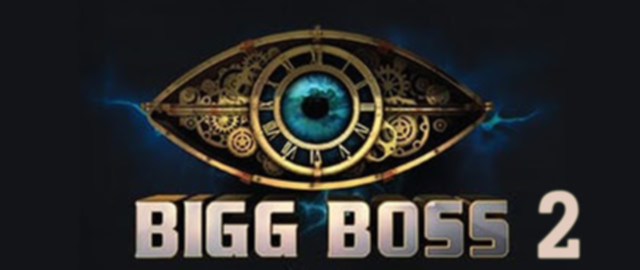

In [20]:
#average blur
blurred = cv2.blur(image, (3, 3))
cv2_imshow(blurred)

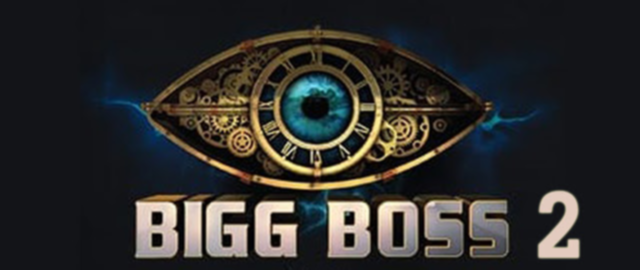

In [21]:
#gaussian blur
blurred = cv2.GaussianBlur(image, (3, 3), 0)
cv2_imshow(blurred)

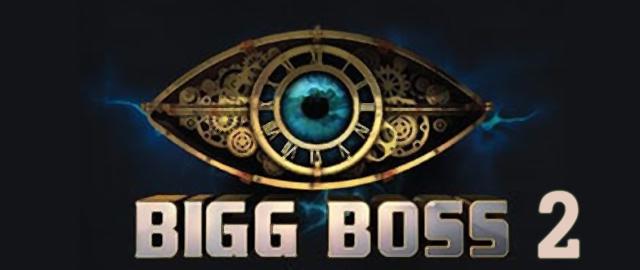

In [22]:
#median blur
blurred = cv2.medianBlur(image, 3)
cv2_imshow(blurred)

# **Contours**
It detects the edges in a picture and performs connected edges analysis to determine if all the connected edges together form a block or an object.

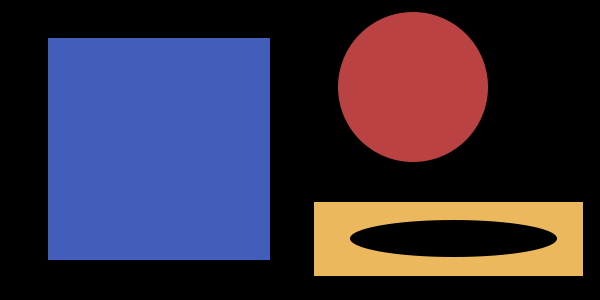

In [24]:
image = cv2.imread("/content/openCV/IMAGES/basic_shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converting image to grayscale 
cv2_imshow(image)

In [26]:
#Internal Contour
import imutils
cnts = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
clone = image.copy()
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

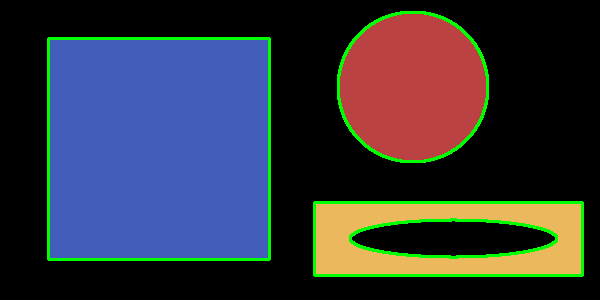

In [27]:
cv2_imshow(clone)

In [28]:
#External contours
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

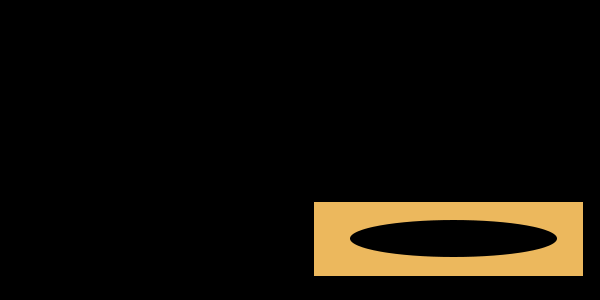

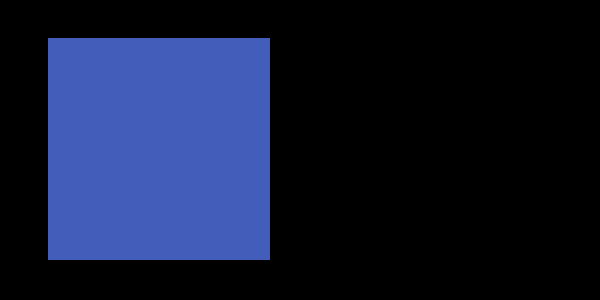

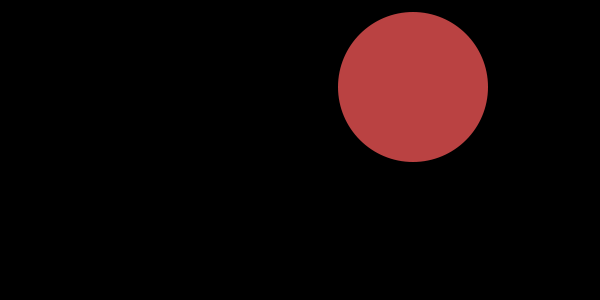

In [29]:
for c in cnts:
	# construct a mask by drawing only the current contour
	mask = np.zeros(gray.shape, dtype="uint8")
	cv2.drawContours(mask, [c], -1, 255, -1)

	# show the images
	#cv2.imshow("Image", image)
	#cv2.imshow("Mask", mask)
	cv2_imshow(cv2.bitwise_and(image, image, mask=mask))

# **License plate detection**

In [30]:
image = cv2.imread("/content/openCV/IMAGES/1.jpg")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

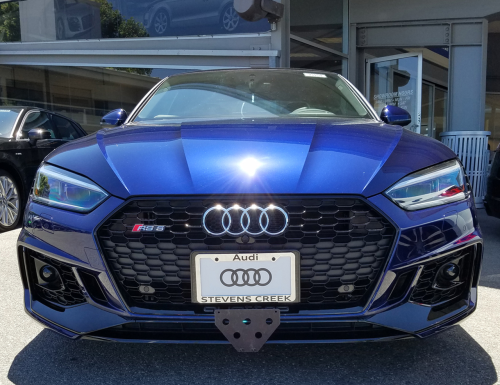

In [31]:
cv2_imshow(image)

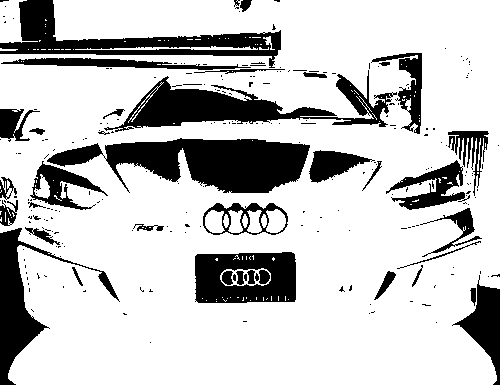

In [32]:
(T, threshInv) = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2_imshow(threshInv)

194 251 103 53


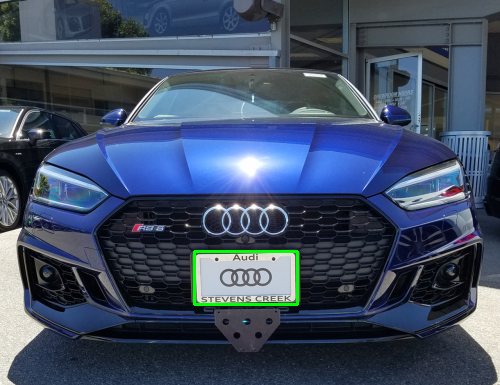

In [34]:
cnts = cv2.findContours(threshInv.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]
clone = image.copy()

for cnt in cnts:
	x,y,w,h = cv2.boundingRect(cnt) # converting the contour into an actual set of co-ordinates
	
	if (w<120 and w>90 and h<70 and h>30):
		print (x,y,w,h)
		cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2) # start x, start y and then end x, end y are the co-ordinates for the rectangle
		cv2_imshow(image)